# Lead Scoring Case Study

Submitted By:

                1. R Raajiv (DS C-49)
                2. Deepak Rout (DS C-49)
                3. Raviraj Kangle Desai (DS C-49)

# Problem Statement

An education company X Education sells online courses to industry professionals. The company wishes to make the process more efficient by making use of a ML model in order to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


# Data

We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes as follows:-

    Lead Source
    Total Time Spent on Website
    Total Visits
    Last Activity etc. 

The target variable is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

We need to check out for all the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.




# Goals

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company, which our model should be able to adjust to if the company's requirement changes in the future. These problems are provided in a separate doc file and we need to fill it based on the logistic regression model we get in the first step. This has to be included in our final PPT where we will make recommendations.



### 1. Importing Libraries

In [14]:
# Importing esssential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Reading the Data

In [15]:
# Reading .csv file into dataframe
df = pd.read_csv("C:\\Users\\RAAJIV\\Downloads\\Lead Scoring Apr 23\\Lead Scoring Assignment\Leads.csv")

In [18]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### 3. Data Exploration

In [16]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [17]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [20]:
df.shape

(9240, 37)

Insight:

The dataframe has 9240 rows and 37 columns

In [21]:
# Info of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 Insight:

1. The dataframe has missing values. 

2. Unnecessary columns are to be dropped

In [22]:
# Check whether there are any duplicates
df.duplicated().sum()

0

Insight: 
    
The dataframe has no duplicate rows present in it.

## 4. Data Cleaning

### 4.1 Dropping unnecessary columns

In [24]:
# We will drop columns which are unnecessary
column_list = ['Prospect ID','Lead Number']
df = df.drop(column_list, axis=1) 

In [25]:
# Confirming dropping of unnecessary columns
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 4.2 Converting df string values to lowercase

In [26]:
# Converting df values to lowercase
df=df.applymap(lambda x:x.lower() if type(x) == str else x)

In [27]:
# Confirming change to lowercase
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,NaN,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,no,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,no,email marked spam
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,no,potential lead,mumbai,02.medium,01.high,14.0,19.0,no,yes,sms sent
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,no,potential lead,mumbai,02.medium,01.high,13.0,20.0,no,yes,sms sent
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,no,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,no,sms sent


#### 4.3 Replacing 'select' with NaN

In [29]:
# We will replace 'select' value in DF with NaN since it represents missing data as the lead has not selected any option
df = df.replace('select', np.nan)

In [30]:
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,NaN,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,no,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,no,email marked spam
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,no,potential lead,mumbai,02.medium,01.high,14.0,19.0,no,yes,sms sent
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,no,potential lead,mumbai,02.medium,01.high,13.0,20.0,no,yes,sms sent
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,no,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,no,sms sent


#### 4.4 Checking and dropping columns with one unique value

In [31]:
# identify columns with unique values since they do not contribute towards our analysis
df.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [32]:
# columns with unique values don't contribute towards our analysis, we will drop them
unique_column_list = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
df = df.drop(unique_column_list, axis=1) 

In [33]:
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,NaN,...,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,will revert after reading the email,high in relevance,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,email marked spam
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,wrong number given,might be,potential lead,mumbai,02.medium,01.high,14.0,19.0,yes,sms sent
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,invalid number,not sure,potential lead,mumbai,02.medium,01.high,13.0,20.0,yes,sms sent
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,NaN,NaN,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,sms sent


#### 4.5 Calculatng Columns with Missing values and Dropping columns with significant percentage of missing values

In [34]:
# calculating the percentage of missing values per column
round((df.isnull().sum()/df.shape[0])*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [35]:
# removing columns having >40% null values
null_column_list = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
df = df.drop(null_column_list, axis=1) 

In [37]:
# Reconfirming dropping of columns with null values >40% and percentage of missing data in other columns 
round((df.isnull().sum()/df.shape[0])*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [38]:
# Since there are still high NaN values in six columns which are categorical we will replace them 'not provided'. This will
# bring down the percentage of null values significantly as well as allow filtering in later stage, if required.

df['Country']=df['Country'].fillna('not provided')
df['Specialization']=df['Specialization'].fillna('not provided')
df['What is your current occupation']=df['What is your current occupation'].fillna('not provided')
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('not provided')
df['Tags']=df['Tags'].fillna('not provided')
df['City']=df['City'].fillna('not provided')

In [39]:
# Realculating the percentage of missing values per column
round((df.isnull().sum()/df.shape[0])*100,2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [40]:
# Confirming replacement of NaN values with 'not provided'in six columns
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,no,no,no,no,no,no,interested in other courses,not provided,no,modified
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,no,no,no,no,no,no,ringing,not provided,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,no,no,no,no,no,no,will revert after reading the email,mumbai,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,no,no,no,no,no,no,ringing,mumbai,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,no,no,no,no,no,no,will revert after reading the email,mumbai,no,email marked spam
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,no,no,no,no,no,no,wrong number given,mumbai,yes,sms sent
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,no,no,no,no,no,no,invalid number,mumbai,yes,sms sent
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,no,no,no,no,no,no,not provided,other metro cities,no,sms sent


#### 4.6 Dropping rows with missing values

In [41]:
# Since the max percentage of missing values is 1.48%, we can drop the rows with missing values in them
df1 = df.dropna()

In [44]:
# Shape of New Dataframe
df1.shape

(9074, 23)

In [43]:
# Calculating percentage of rows retained during Data Cleaning Process
round(100*(df1.shape[0]/df.shape[0]),2)

98.2

Insight:

Post dropping of rows with null values we have 9074 rows remaining, which is 98.2% of original number of rows

In [45]:
# Realculating the percentage of missing values per column
round((df1.isnull().sum()/df1.shape[0])*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### 5. Data Visualisation

#### 5.1 Univariate Analysis

#### 5.1.1 Categorical Variables

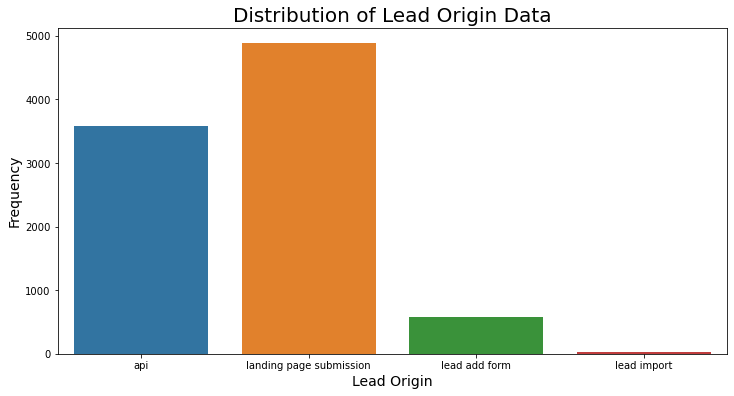

In [47]:
# Visualising distribution of Lead Origin
plt.figure(figsize=(12,6))
sns.countplot(df1['Lead Origin'])
plt.title('Distribution of Lead Origin Data', size = 20)
plt.xlabel('Lead Origin', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

API and landing page submission are major factors towards creating leads

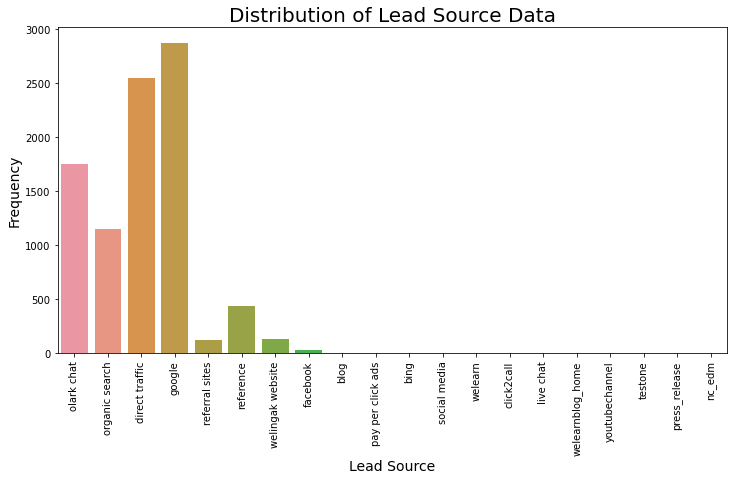

In [48]:
# Visualising distribution of Lead Source
plt.figure(figsize=(12,6))
sns.countplot(df1['Lead Source']).tick_params(axis='x', rotation =90)
plt.title('Distribution of Lead Source Data', size = 20)
plt.xlabel('Lead Source', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Olark chat, Organic Search, Direct Traffic and Google are major factors towards creating leads

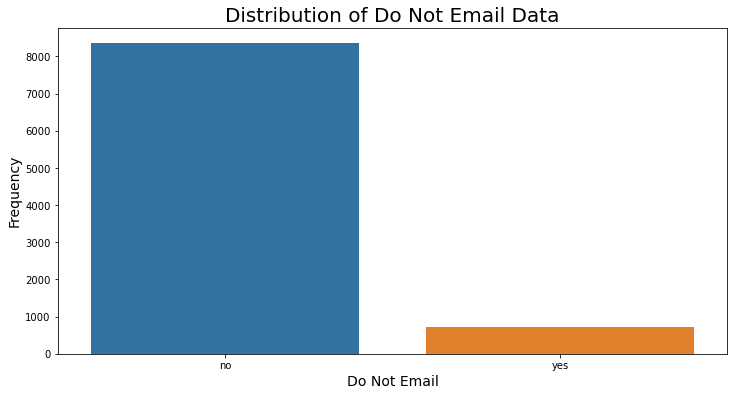

In [49]:
# Visualising distribution of Do Not Email
plt.figure(figsize=(12,6))
sns.countplot(df1['Do Not Email'])
plt.title('Distribution of Do Not Email Data', size = 20)
plt.xlabel('Do Not Email', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from clients who do not wish to be emailed.

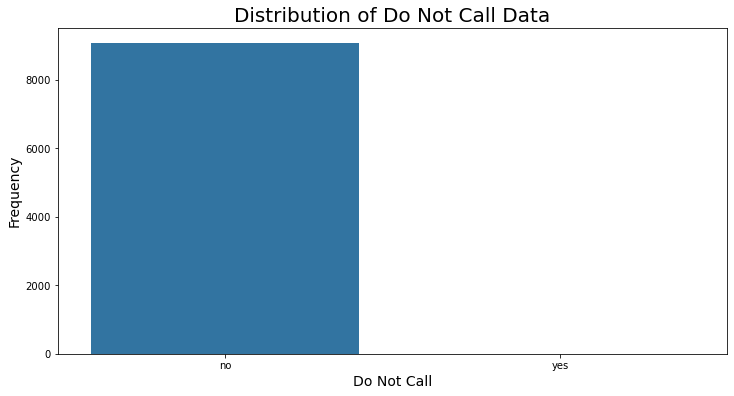

In [50]:
# Visualising distribution of Do Not Call 
plt.figure(figsize=(12,6))
sns.countplot(df1['Do Not Call'])
plt.title('Distribution of Do Not Call Data', size = 20)
plt.xlabel('Do Not Call', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from clients who do not wish to be called.

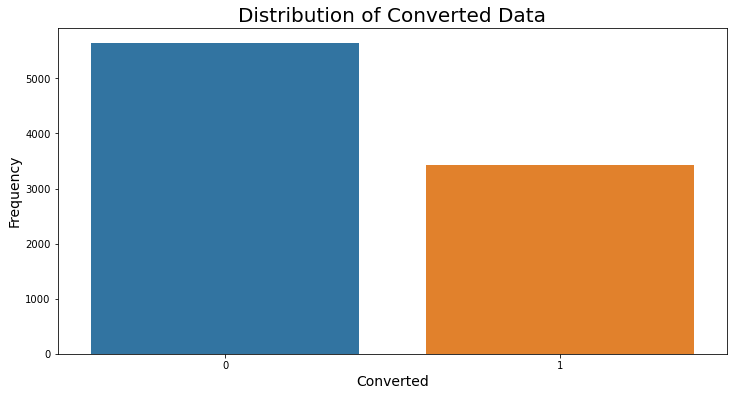

In [51]:
# Visualising distribution of Converted
plt.figure(figsize=(12,6))
sns.countplot(df1['Converted'])
plt.title('Distribution of Converted Data', size = 20)
plt.xlabel('Converted', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

This displays the Dependent 'Y' variable and the data seems to be balanced but not evenly.

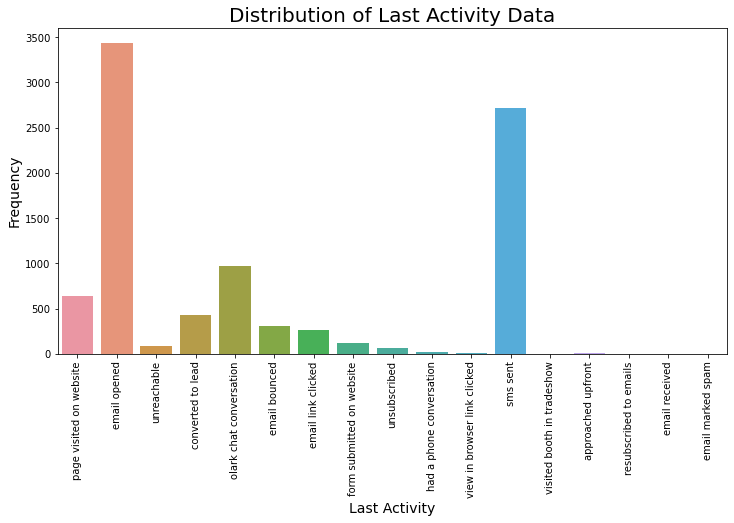

In [52]:
# Visualising distribution of Last Activity
plt.figure(figsize=(12,6))
sns.countplot(df1['Last Activity']).tick_params(axis='x', rotation =90)
plt.title('Distribution of Last Activity Data', size = 20)
plt.xlabel('Last Activity', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from clients who performed last activities such as opening email, to whom SMS was sent or who had an Olark chat conversation.

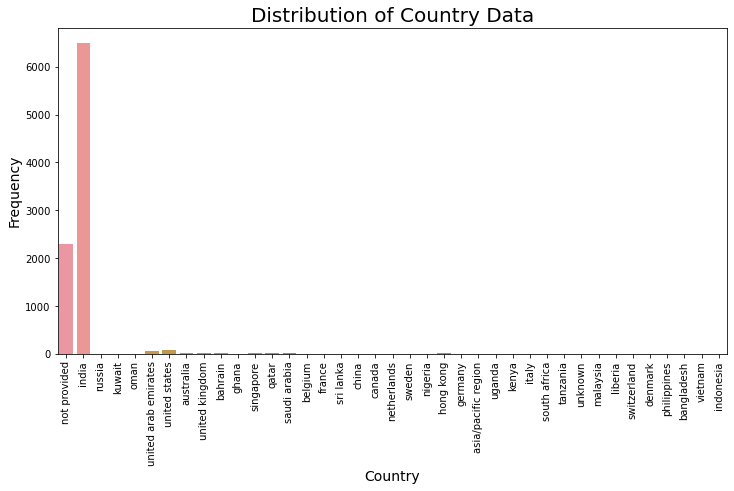

In [53]:
# Visualising distribution of Country
plt.figure(figsize=(12,6))
sns.countplot(df1['Country']).tick_params(axis='x', rotation =90)
plt.title('Distribution of Country Data', size = 20)
plt.xlabel('Country', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from India

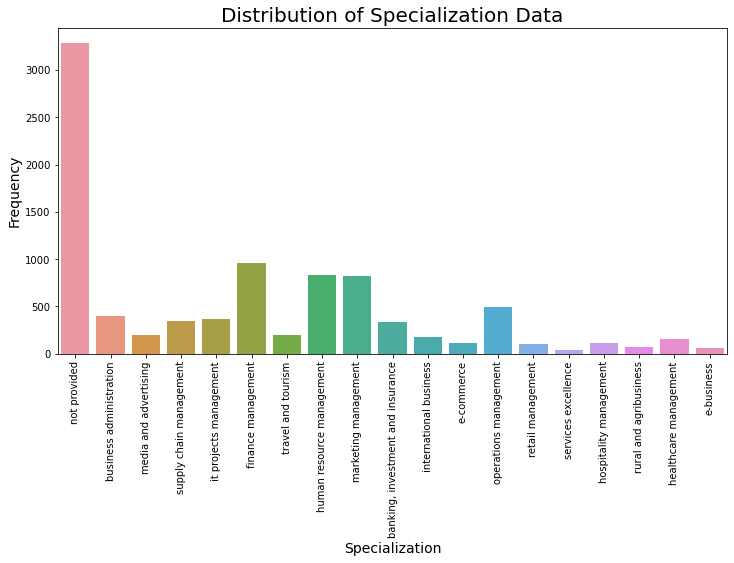

In [54]:
# Visualising distribution of Specialization
plt.figure(figsize=(12,6))
sns.countplot(df1['Specialization']).tick_params(axis='x', rotation =90)
plt.title('Distribution of Specialization Data', size = 20)
plt.xlabel('Specialization', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from industry domains of Finance Management, HR Management and Marketing Management

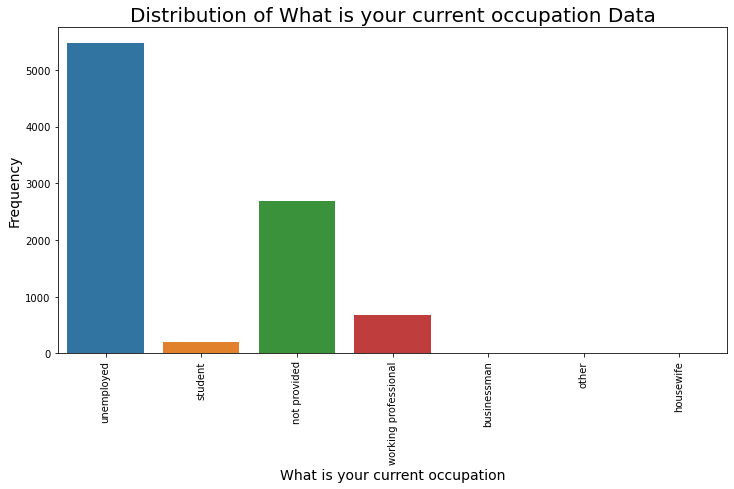

In [55]:
# Visualising distribution of What is your current occupation
plt.figure(figsize=(12,6))
sns.countplot(df1['What is your current occupation']).tick_params(axis='x', rotation =90)
plt.title('Distribution of What is your current occupation Data', size = 20)
plt.xlabel('What is your current occupation', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from unemployed personnel.

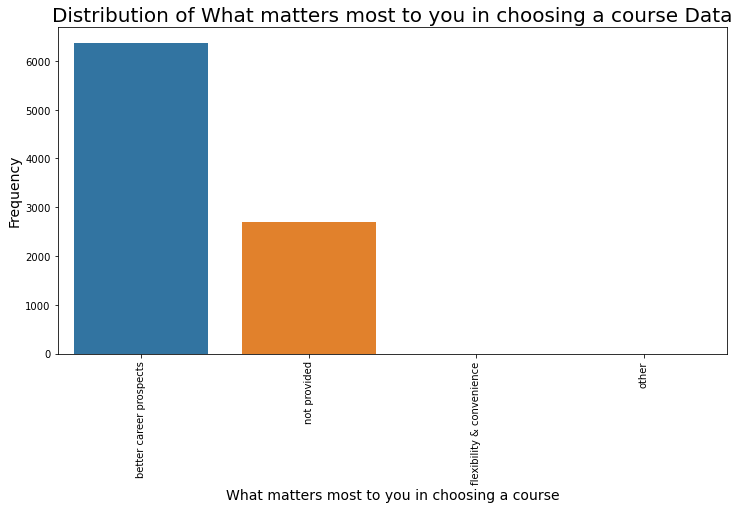

In [56]:
# Visualising distribution of What matters most to you in choosing a course
plt.figure(figsize=(12,6))
sns.countplot(df1['What matters most to you in choosing a course']).tick_params(axis='x', rotation =90)
plt.title('Distribution of What matters most to you in choosing a course Data', size = 20)
plt.xlabel('What matters most to you in choosing a course', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads are generated from personnel looking for better career prospects.

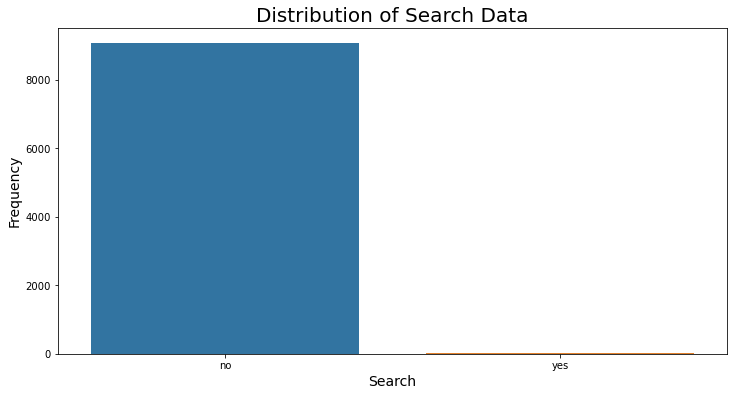

In [58]:
# Visualising distribution of Search
plt.figure(figsize=(12,6))
sns.countplot(df1['Search'])
plt.title('Distribution of Search Data', size = 20)
plt.xlabel('Search', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not see any ad in search.

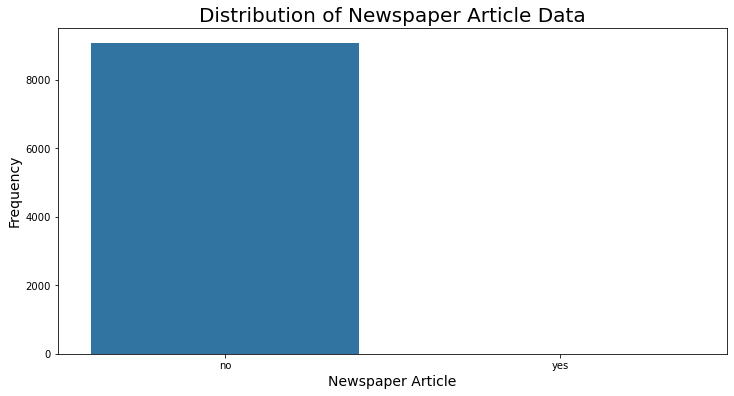

In [59]:
# Visualising distribution of Newspaper Article
plt.figure(figsize=(12,6))
sns.countplot(df1['Newspaper Article'])
plt.title('Distribution of Newspaper Article Data', size = 20)
plt.xlabel('Newspaper Article', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not see any ad in newspaper article.

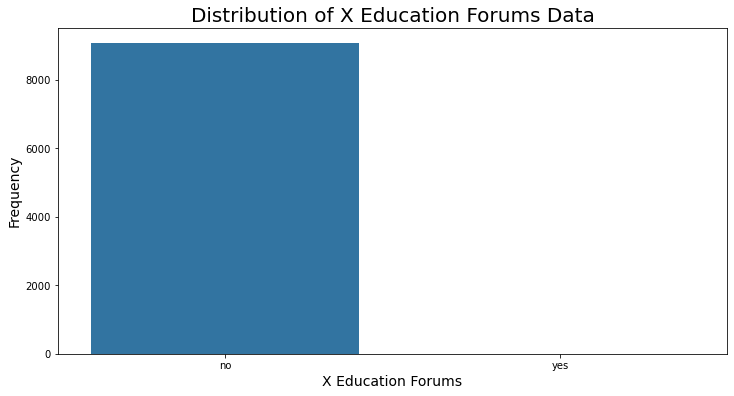

In [60]:
# Visualising distribution of X Education Forums
plt.figure(figsize=(12,6))
sns.countplot(df1['X Education Forums'])
plt.title('Distribution of X Education Forums Data', size = 20)
plt.xlabel('X Education Forums', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not see any ad in X Education Forums.

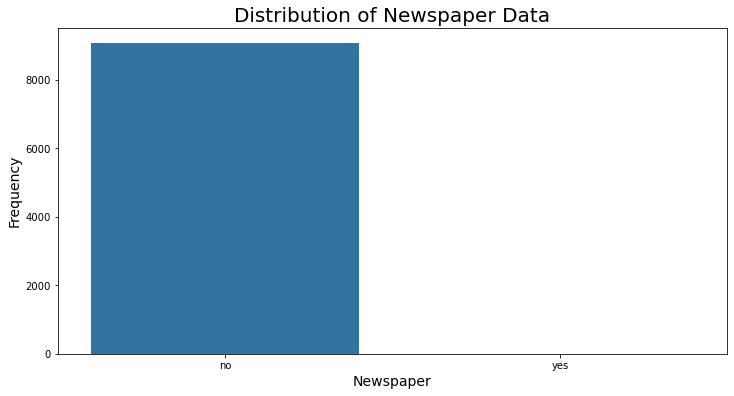

In [61]:
# Visualising distribution of Newspaper
plt.figure(figsize=(12,6))
sns.countplot(df1['Newspaper'])
plt.title('Distribution of Newspaper Data', size = 20)
plt.xlabel('Newspaper', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not see any any ad in newspaper.

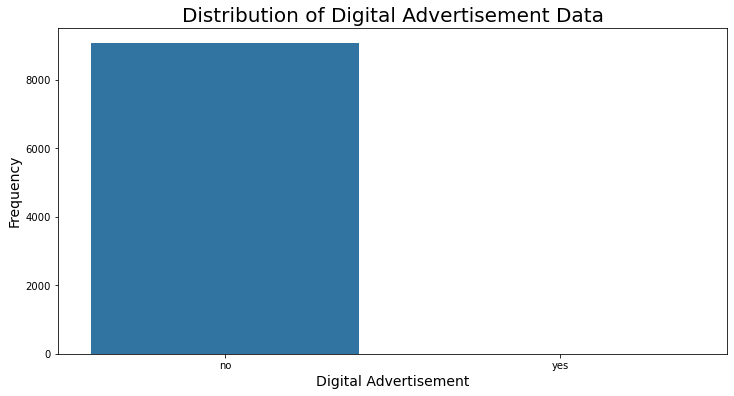

In [62]:
# Visualising distribution of Digital Advertisement
plt.figure(figsize=(12,6))
sns.countplot(df1['Digital Advertisement'])
plt.title('Distribution of Digital Advertisement Data', size = 20)
plt.xlabel('Digital Advertisement', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not see any ad in digital advertisement.

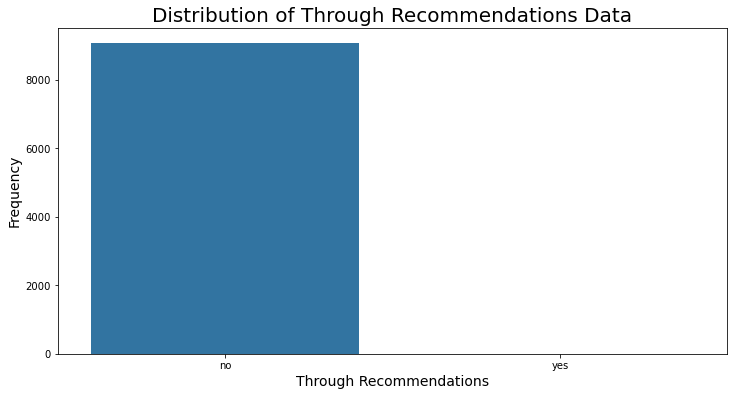

In [63]:
# Visualising distribution of Through Recommendations
plt.figure(figsize=(12,6))
sns.countplot(df1['Through Recommendations'])
plt.title('Distribution of Through Recommendations Data', size = 20)
plt.xlabel('Through Recommendations', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not come through any recommendations.

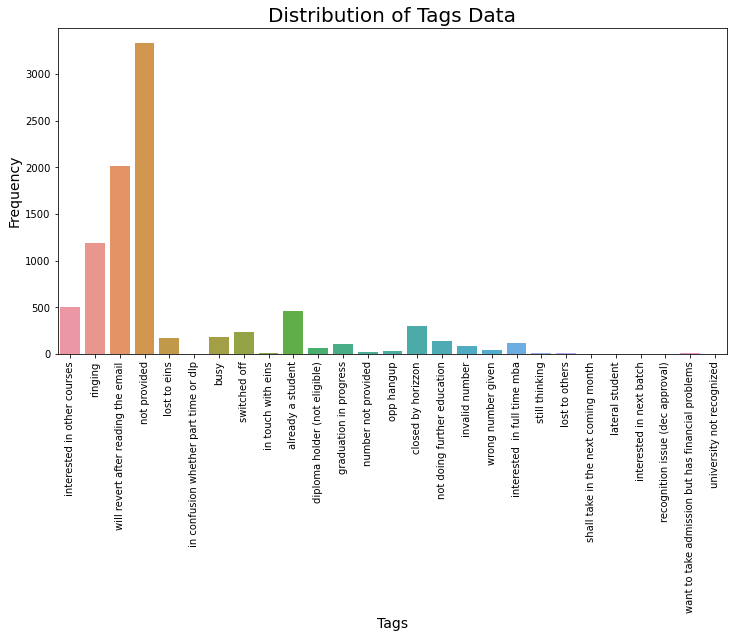

In [64]:
# Visualising distribution of Tags
plt.figure(figsize=(12,6))
sns.countplot(df1['Tags']).tick_params(axis='x', rotation =90)
plt.title('Distribution of Tags Data', size = 20)
plt.xlabel('Tags', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads were from clients having current status as those who stated to revert post reading the email.

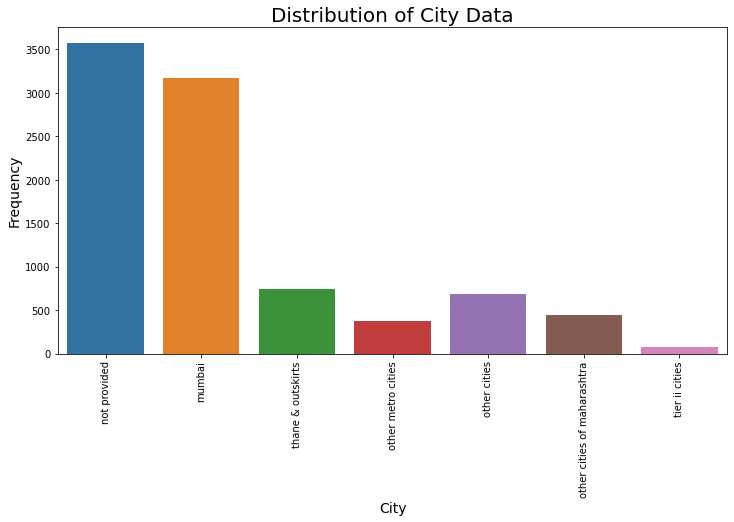

In [65]:
# Visualising distribution of City
plt.figure(figsize=(12,6))
sns.countplot(df1['City']).tick_params(axis='x', rotation =90)
plt.title('Distribution of City Data', size = 20)
plt.xlabel('City', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads were from Mumbai.

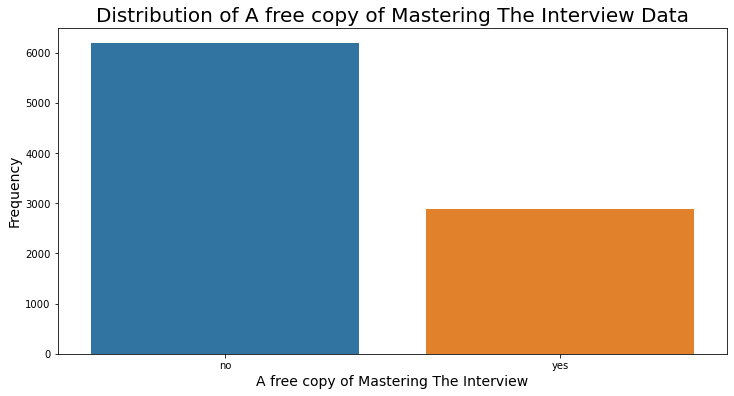

In [66]:
# Visualising distribution of A free copy of Mastering The Interview
plt.figure(figsize=(12,6))
sns.countplot(df1['A free copy of Mastering The Interview'])
plt.title('Distribution of A free copy of Mastering The Interview Data', size = 20)
plt.xlabel('A free copy of Mastering The Interview', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Insight:

Majority of the leads did not want free copy of 'Mastering the Interview'.

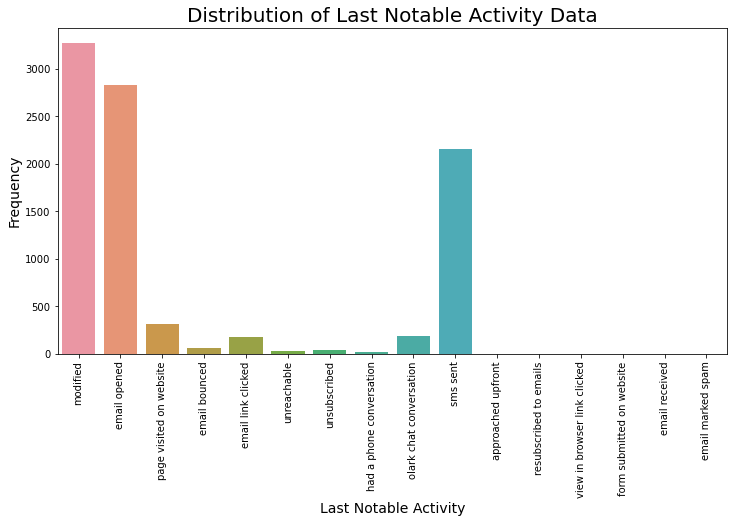

In [67]:
# Visualising distribution of Last Notable Activity
plt.figure(figsize=(12,6))
sns.countplot(df1['Last Notable Activity']).tick_params(axis='x', rotation =90)
plt.title('Distribution of Last Notable Activity Data', size = 20)
plt.xlabel('Last Notable Activity', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

 Insight:

The last notable activity of majority of the leads was opening the email or sending the SMS.

#### 5.1.2 Numerical variables

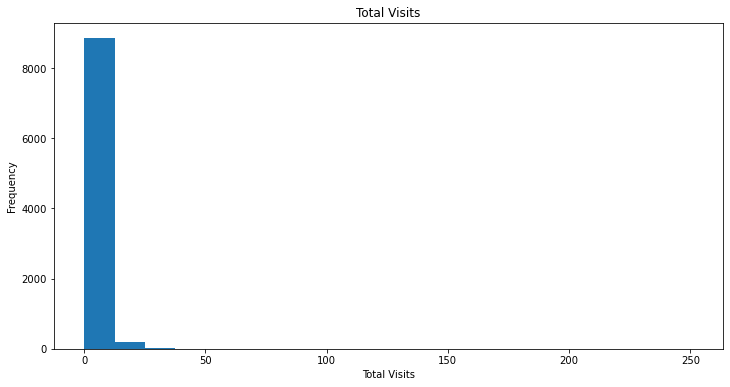

In [68]:
# Visualising histogram of TotalVisits
plt.figure(figsize=(12,6))
plt.hist(df1['TotalVisits'], bins=20)
plt.title('Total Visits')
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.show()

Insight:

The majority of the leads were converted in initial few visits on the website.

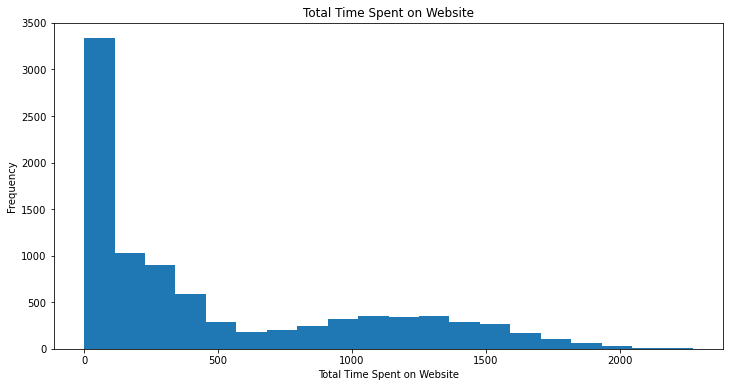

In [69]:
# Visualising histogram of Total Time Spent on Website
plt.figure(figsize=(12,6))
plt.hist(df1['Total Time Spent on Website'], bins=20)
plt.title('Total Time Spent on Website')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Frequency')
plt.show()

Insight:

The majority of the leads were converted during initial few hours on the website.

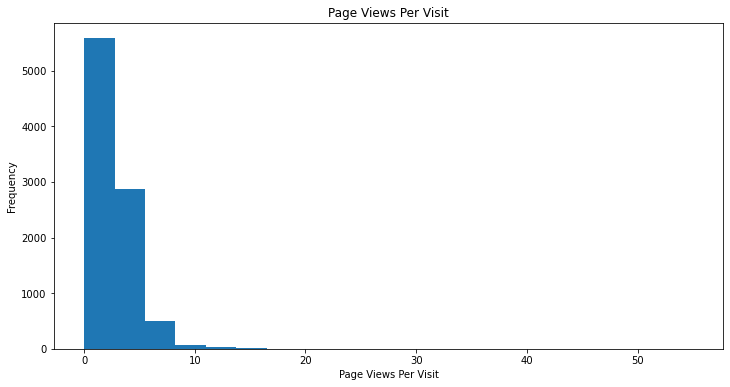

In [70]:
# Visualising histogram of Page Views Per Visit
plt.figure(figsize=(12,6))
plt.hist(df1['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Frequency')
plt.show()

Insight:

The majority of the leads converted had lesser average page views on the website.

### 5.2 Analysis of categorical variables with respect to dependent variable

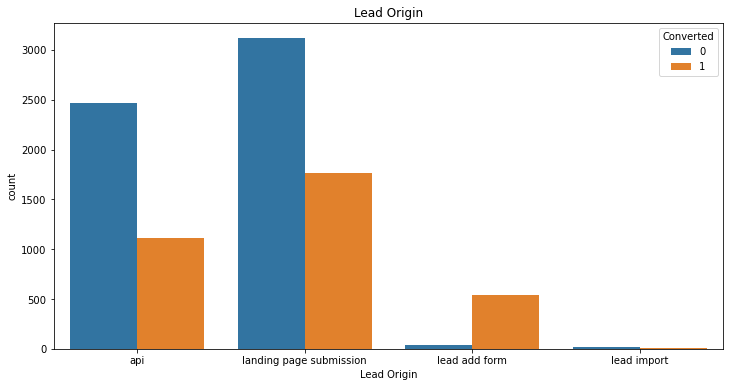

In [71]:
# We will try to relate categorical variables to dependent 'Y' variable

# Visualising Lead Origin Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Lead Origin', hue='Converted', data=df1)
plt.title('Lead Origin')
plt.show()

Insight:

Lead add form has a clear influence on dependent variable

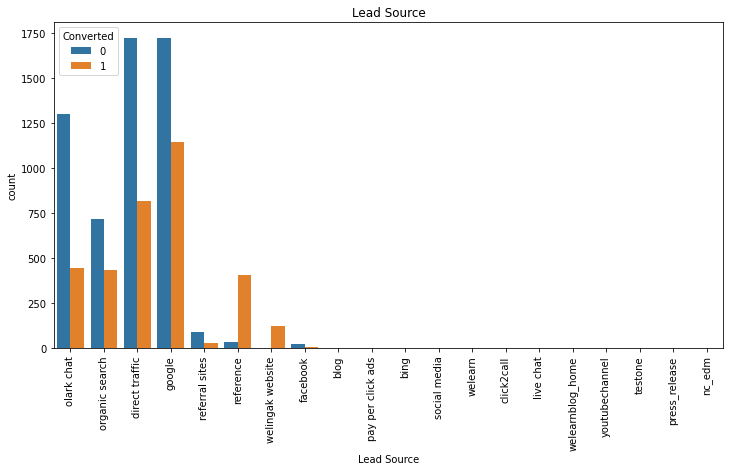

In [72]:
# Visualising Lead Source Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Lead Source', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Lead Source')
plt.show()

Insight:

Reference and welingak website has a clear influence on dependent variable.

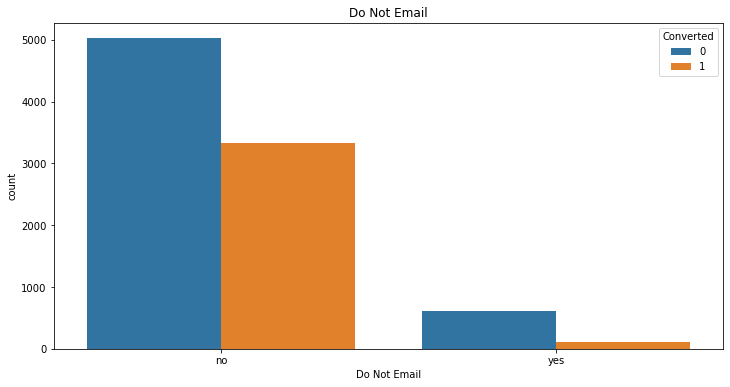

In [73]:
# Visualising Do Not Email Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Do Not Email', hue='Converted', data=df1)
plt.title('Do Not Email')
plt.show()

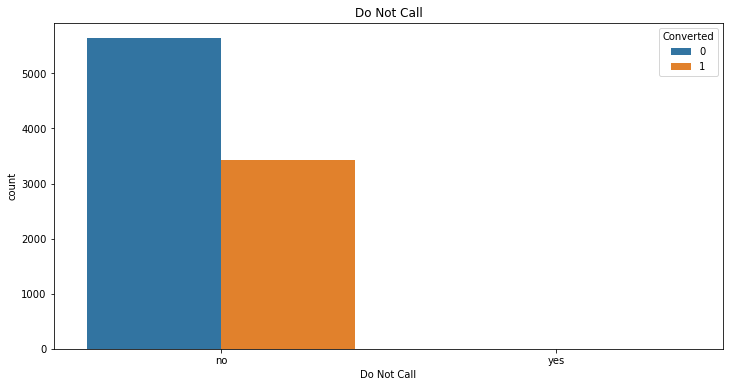

In [74]:
# Visualising Do Not Calll Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Do Not Call', hue='Converted', data=df1)
plt.title('Do Not Call')
plt.show()

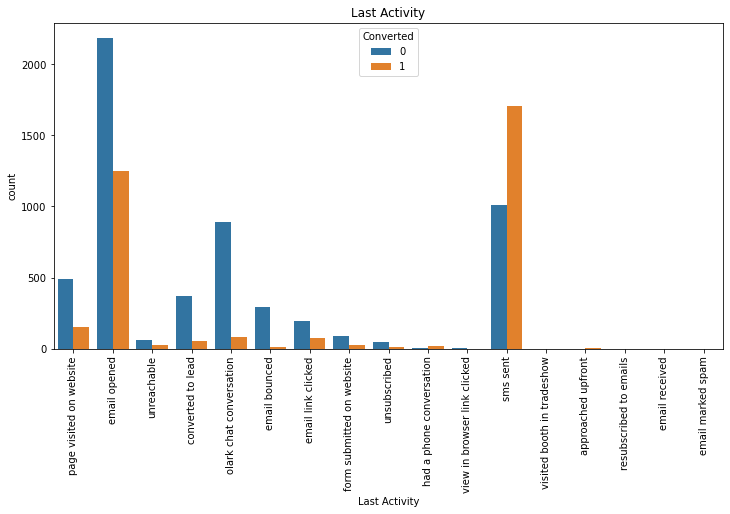

In [75]:
# Visualising Last Activity Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Last Activity', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Last Activity')
plt.show()

Insight:

SMS sent has a clear influence on dependent variable.

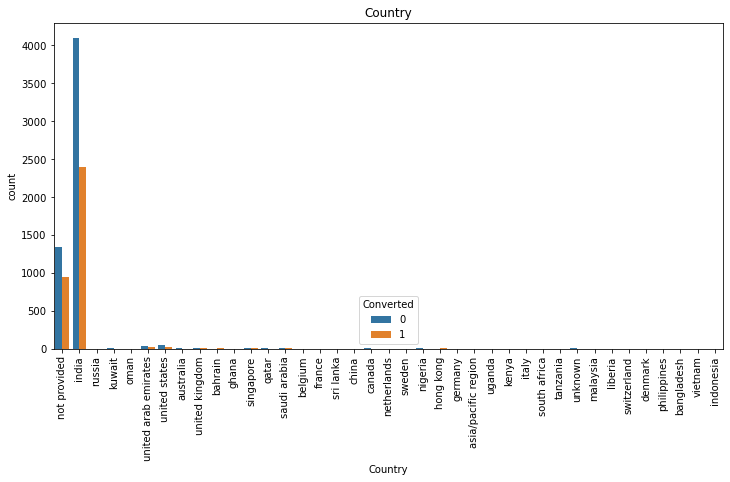

In [76]:
# Visualising Country Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Country', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Country')
plt.show()

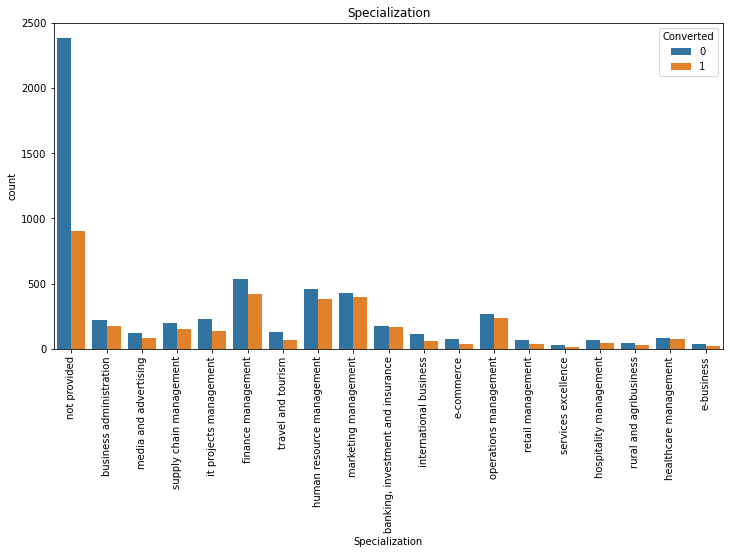

In [77]:
# Visualising Specialization Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Specialization', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Specialization')
plt.show()

 Insight:

Specialization with 'Management' in them have higher number of leads as well as leads converted. We will combine specialization with 'Management' under one head 'Management Specializations'.

In [78]:
df1['Specialization']= df1['Specialization'].replace(['finance management', 
                                                      'human resource management', 
                                                      'marketing management',
                                                      'operations management',
                                                      'it projects management', 
                                                      'supply chain management', 
                                                      'healthcare management', 
                                                      'hospitality management', 
                                                      'retail management'], 'management specializations')

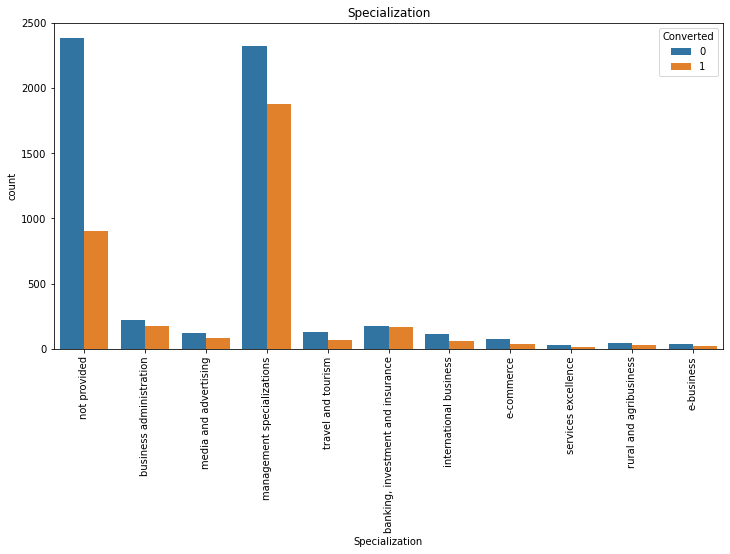

In [79]:
# Visualising Specialization Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Specialization', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Specialization')
plt.show()

 Insight:

We observe large number of leads and converted leads in management specialization.

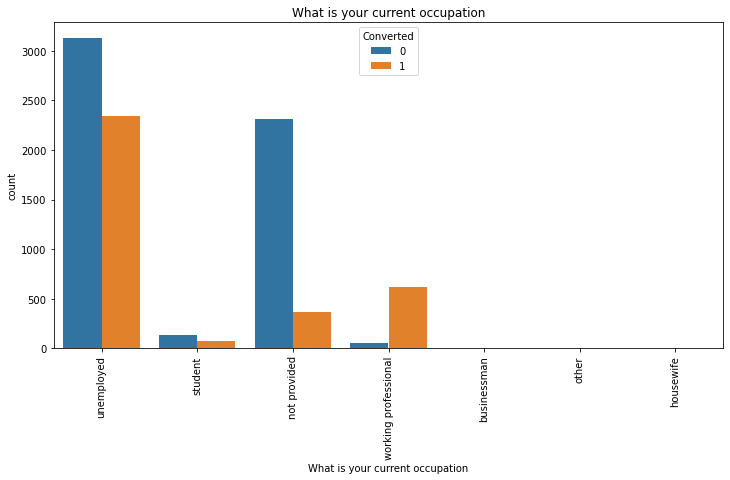

In [80]:
# Visualising What is your current occupation Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='What is your current occupation', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('What is your current occupation')
plt.show()

Insight:

Working Professional has a clear influence on dependent variable.

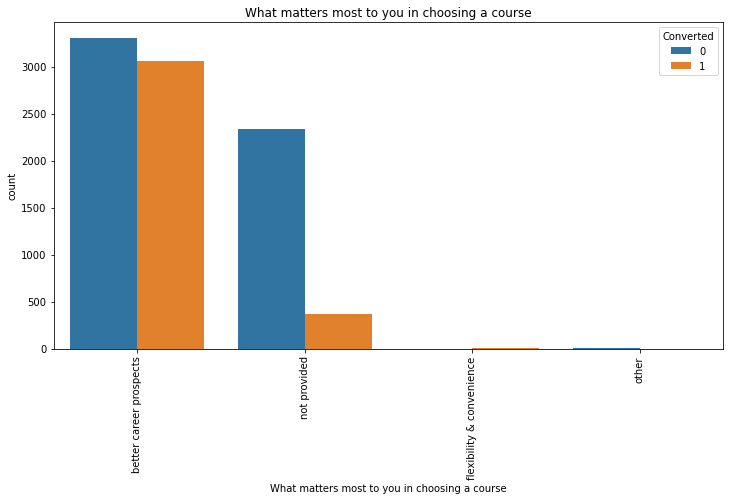

In [81]:
# Visualising What matters most to you in choosing a course Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('What matters most to you in choosing a course')
plt.show()

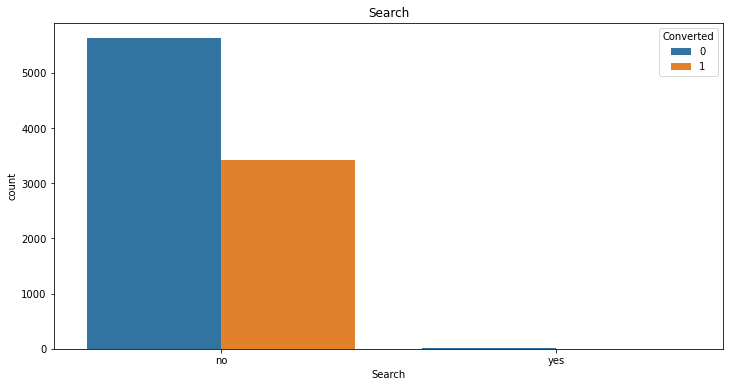

In [82]:
# Visualising Search Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Search', hue='Converted', data=df1)
plt.title('Search')
plt.show()

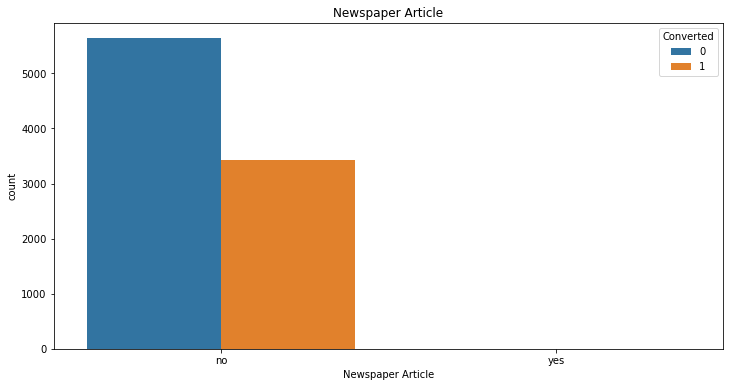

In [83]:
# Visualising Newspaper Article Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Newspaper Article', hue='Converted', data=df1)
plt.title('Newspaper Article')
plt.show()

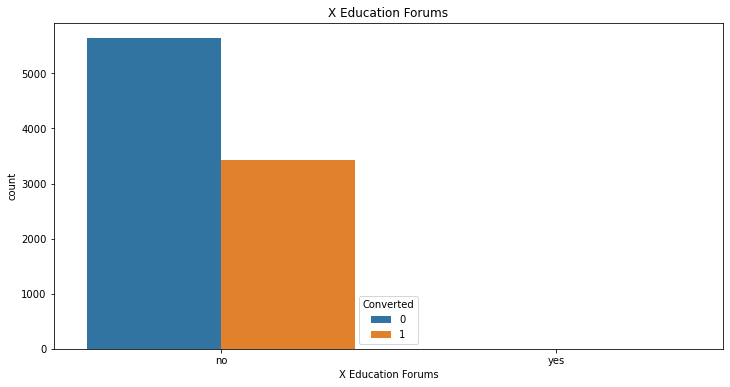

In [84]:
# Visualising X Education Forums Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='X Education Forums', hue='Converted', data=df1)
plt.title('X Education Forums')
plt.show()

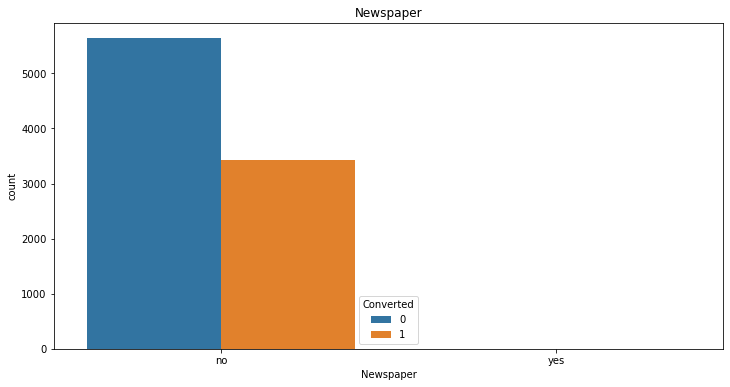

In [85]:
# Visualising Newspaper Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Newspaper', hue='Converted', data=df1)
plt.title('Newspaper')
plt.show()

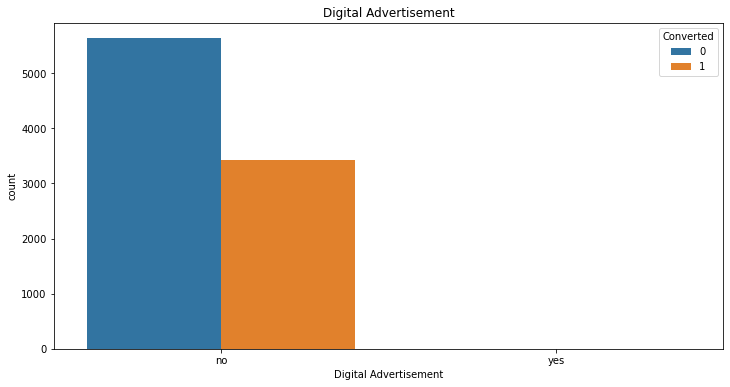

In [86]:
# Visualising Digital Advertisement Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Digital Advertisement', hue='Converted', data=df1)
plt.title('Digital Advertisement')
plt.show()

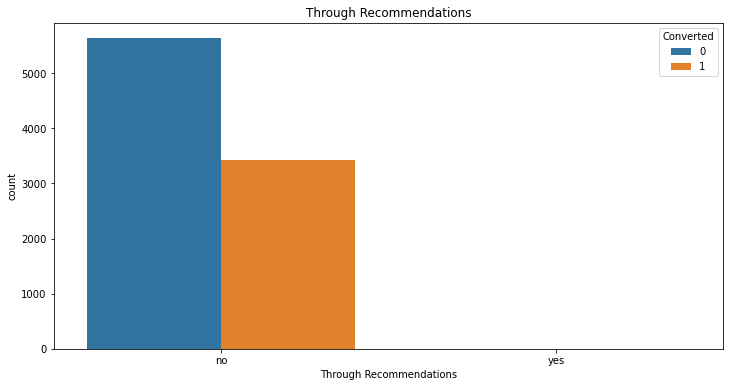

In [87]:
# Visualising Through Recommendations Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Through Recommendations', hue='Converted', data=df1)
plt.title('Through Recommendations')
plt.show()

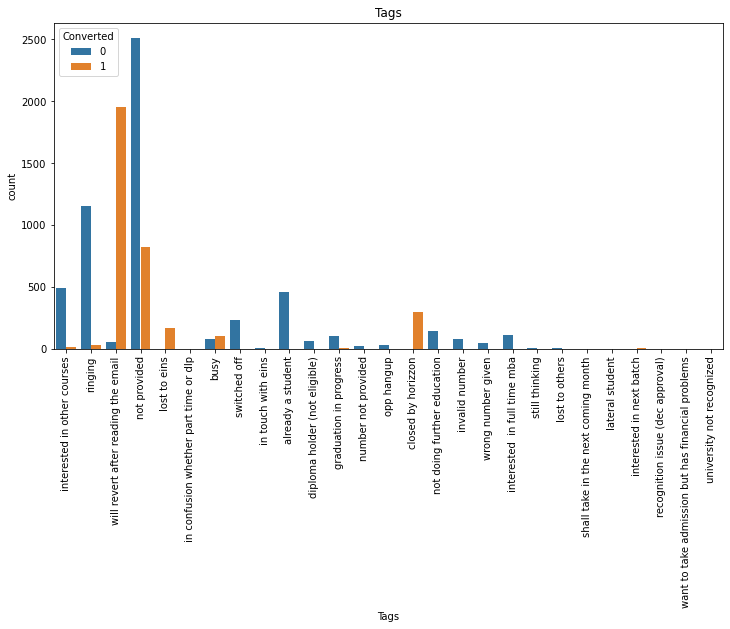

In [88]:
# Visualising Tags Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Tags', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Tags')
plt.show()

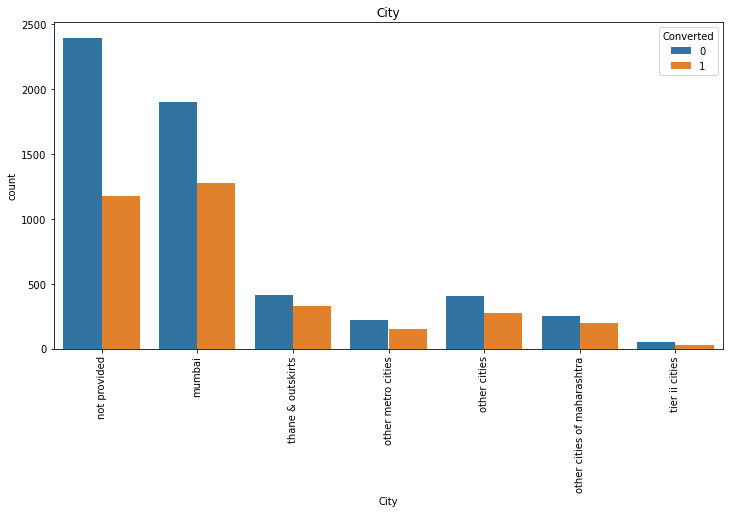

In [89]:
# Visualising City Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='City', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('City')
plt.show()

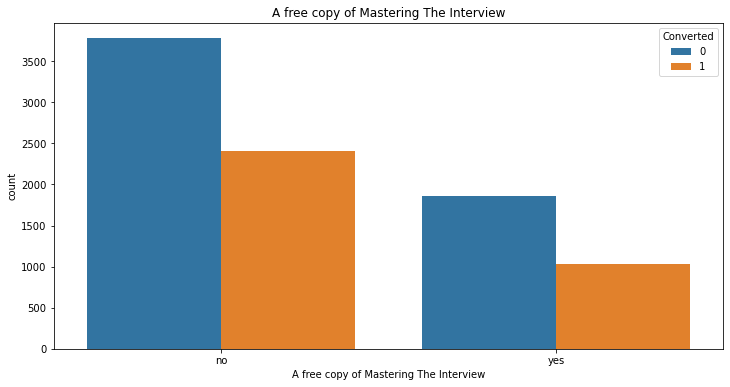

In [90]:
# Visualising A free copy of Mastering The Interview Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df1)
plt.title('A free copy of Mastering The Interview')
plt.show()

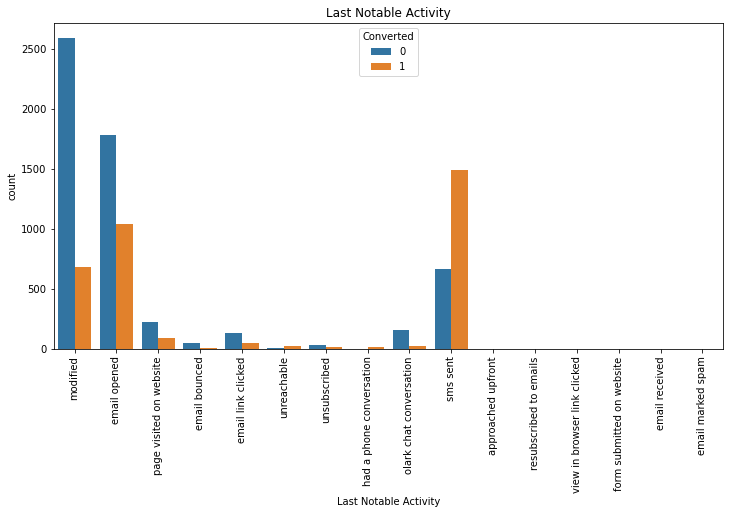

In [91]:
# Visualising Last Notable Activity Vs Target Variable
plt.figure(figsize = (12,6))
sns.countplot(x='Last Notable Activity', hue='Converted', data=df1).tick_params(axis='x', rotation =90)
plt.title('Last Notable Activity')
plt.show()

Insight:

SMS sent has a clear influence on dependent variable.

### 5.3 Pair Plot

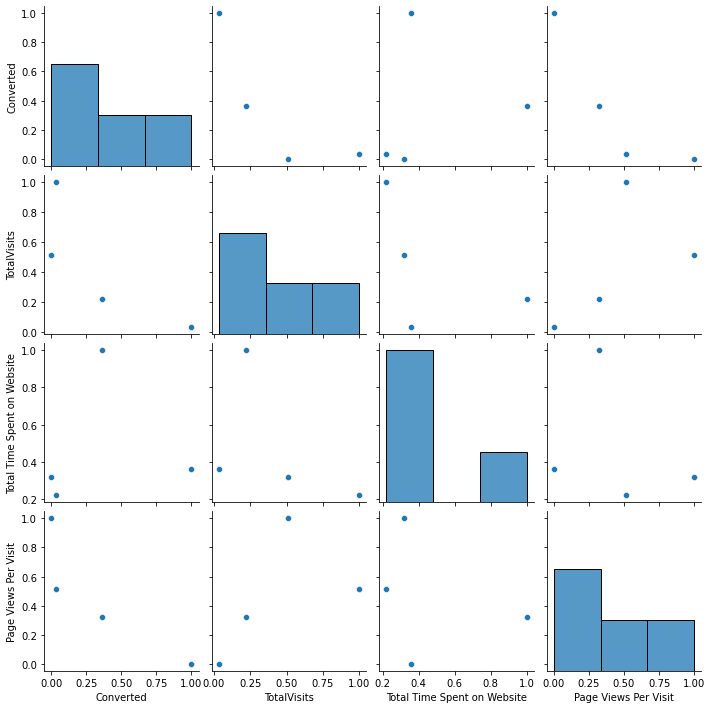

In [92]:
# visualise the pair plots

sns.pairplot(df1.corr())
plt.show()

### 5.4 Heatmap

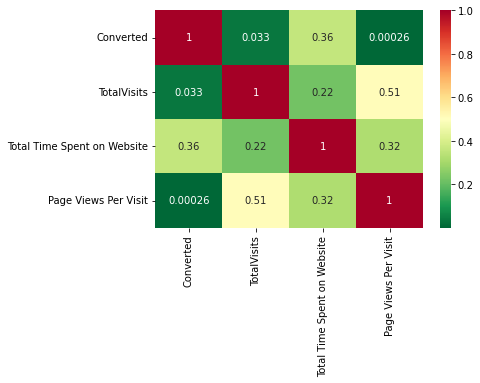

In [93]:
# visualise the heatmap to check for correlation, if any

sns.heatmap(df1.corr(), cmap='RdYlGn_r', annot=True)
plt.show()

Insight:

No significant collinearity is observed between the variables.

#### 5.5 Outliers

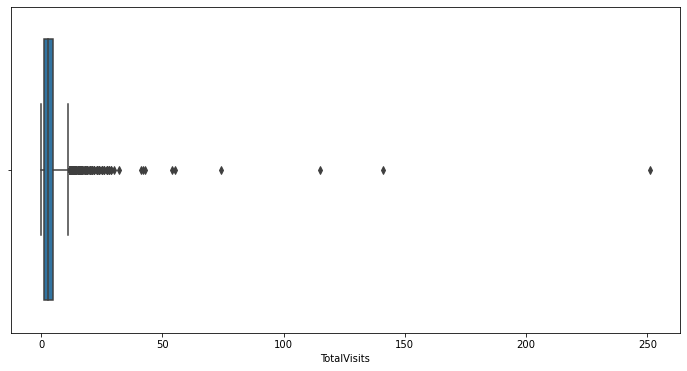

In [94]:
# Check for outliers in numeric variables

# Checking outliers for TotalVisits
plt.figure(figsize=(12,6))
sns.boxplot(df1['TotalVisits'])
plt.show()

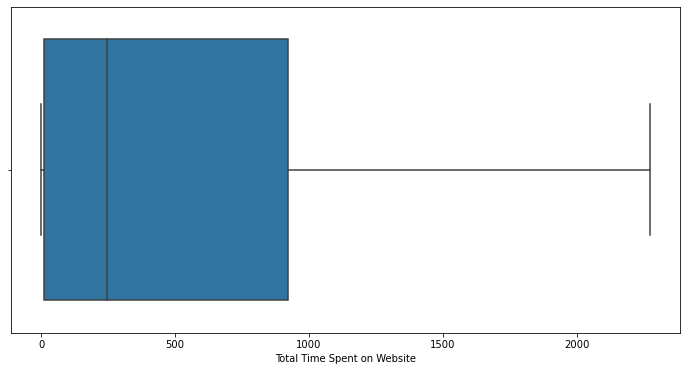

In [95]:
# Checking outliers for Total Time Spent on Website
plt.figure(figsize=(12,6))
sns.boxplot(df1['Total Time Spent on Website'])
plt.show()


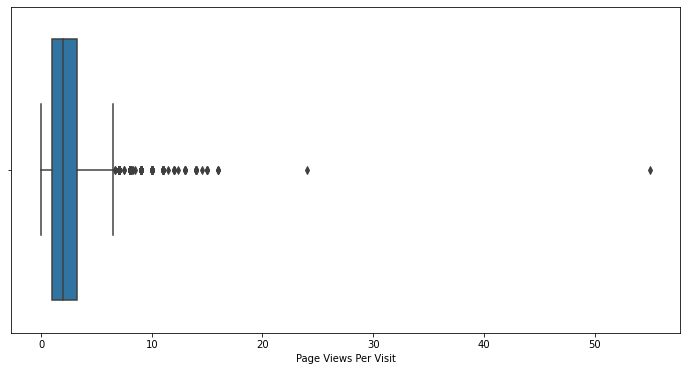

In [96]:
# Checking outliers for Page Views Per Visit
plt.figure(figsize=(12,6))
sns.boxplot(df1['Page Views Per Visit'])
plt.show()

Insight:

Outliers are present in TotalVisits and Page Views Per Visit

#### 5.5.1 Outliers Treatment

In [97]:
numeric_columns=df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 95% and 99%

numeric_columns.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [98]:
# We will cap values of TotalVisits and Page Views Per Visit at 99 percentile
df1.TotalVisits.loc[df1.TotalVisits>=df1.TotalVisits.quantile(0.99)]=df1.TotalVisits.quantile(0.99)
df1['Page Views Per Visit'].loc[df1['Page Views Per Visit']>=df1['Page Views Per Visit'].quantile(0.99)]=df1['Page Views Per Visit'].quantile(0.99)

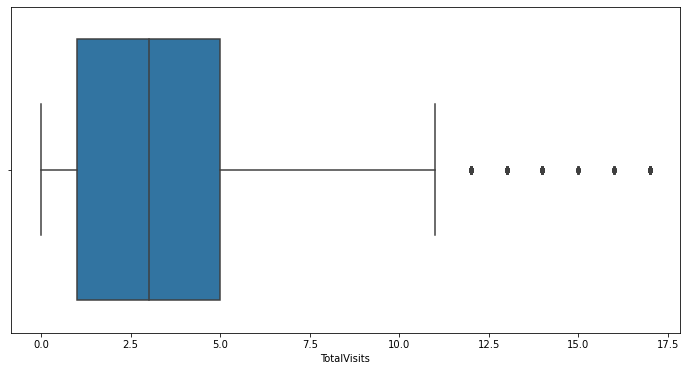

In [99]:
# Checking outliers for TotalVisits post capping
plt.figure(figsize=(12,6))
sns.boxplot(df1['TotalVisits'])
plt.show()

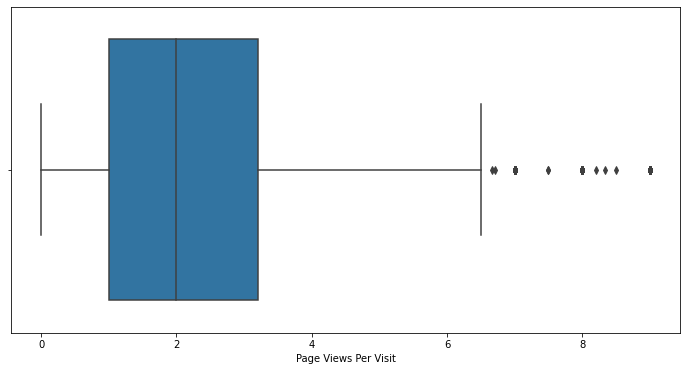

In [100]:
# Checking outliers for Page Views Per Visit post capping
plt.figure(figsize=(12,6))
sns.boxplot(df1['Page Views Per Visit'])
plt.show()

### 6. Handling Sales team generated values and highly imbalanced data

In [101]:
# We can drop Sales team generated columns because these are the values 
# which have been entered post connecting with the student. This data is not
# having relevance towards development of our model i.e. Predicting lead score

# These columns are Tags, Last Activity,Last Notable Activity
df1.drop(['Tags','Last Activity','Last Notable Activity'],axis=1, inplace=True)

In [102]:
# Confirming dropping of columns
df1

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,api,olark chat,no,no,0,0.0,0,0.00,not provided,not provided,unemployed,better career prospects,no,no,no,no,no,no,not provided,no
1,api,organic search,no,no,0,5.0,674,2.50,india,not provided,unemployed,better career prospects,no,no,no,no,no,no,not provided,no
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,india,business administration,student,better career prospects,no,no,no,no,no,no,mumbai,yes
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,mumbai,no
4,landing page submission,google,no,no,1,2.0,1428,1.00,india,not provided,unemployed,better career prospects,no,no,no,no,no,no,mumbai,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,saudi arabia,management specializations,unemployed,better career prospects,no,no,no,no,no,no,mumbai,no
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,mumbai,yes
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,india,business administration,unemployed,better career prospects,no,no,no,no,no,no,mumbai,yes
9238,landing page submission,google,no,no,1,3.0,499,3.00,india,management specializations,not provided,not provided,no,no,no,no,no,no,other metro cities,no


In [103]:
# We will also drop columns which have highly imbalanced data

# Lead Origin
df1['Lead Origin'].value_counts(dropna=False)

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64

In [104]:
# Lead Source
df1['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [105]:
# Do Not Email 
df1['Do Not Email'].value_counts(dropna=False)

no     8358
yes     716
Name: Do Not Email, dtype: int64

In [106]:
# Do Not Call (Highly imbalanced - To be Dropped)
df1['Do Not Call'].value_counts(dropna=False)

no     9072
yes       2
Name: Do Not Call, dtype: int64

In [107]:
# TotalVisits
df1['TotalVisits'].value_counts(dropna=False)

0.0     2161
2.0     1679
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
17.0      99
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
Name: TotalVisits, dtype: int64

In [108]:
# Total Time Spent on Website
df1['Total Time Spent on Website'].value_counts(dropna=False)

0       2165
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

In [109]:
# Page Views Per Visit
df1['Page Views Per Visit'].value_counts(dropna=False)

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
1.21       1
3.43       1
2.56       1
6.33       1
2.08       1
Name: Page Views Per Visit, Length: 102, dtype: int64

In [110]:
# Country (Highly imbalanced - To be Dropped because India + not provided = 8797)
df1['Country'].value_counts(dropna=False)

india                   6491
not provided            2296
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [111]:
# Specialization
df1['Specialization'].value_counts(dropna=False)

management specializations           4197
not provided                         3282
business administration               399
banking, investment and insurance     335
media and advertising                 202
travel and tourism                    202
international business                176
e-commerce                            111
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [112]:
# What is your current occupation
df1['What is your current occupation'].value_counts(dropna=False)

unemployed              5476
not provided            2683
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: What is your current occupation, dtype: int64

In [113]:
# What matters most to you in choosing a course (Highly imbalanced - To be Dropped because 
# better career prospects + not provided = 9072)
df1['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6370
not provided                 2702
flexibility & convenience       1
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [114]:
# Search (Highly imbalanced - To be Dropped)
df1['Search'].value_counts(dropna=False)

no     9060
yes      14
Name: Search, dtype: int64

In [115]:
# Newspaper Article (Highly imbalanced - To be Dropped)
df1['Newspaper Article'].value_counts(dropna=False)

no     9072
yes       2
Name: Newspaper Article, dtype: int64

In [116]:
# X Education Forums (Highly imbalanced - To be Dropped)
df1['X Education Forums'].value_counts(dropna=False)

no     9073
yes       1
Name: X Education Forums, dtype: int64

In [117]:
# Newspaper (Highly imbalanced - To be Dropped)
df1['Newspaper'].value_counts(dropna=False)

no     9073
yes       1
Name: Newspaper, dtype: int64

In [118]:
# Digital Advertisement (Highly imbalanced - To be Dropped)
df1['Digital Advertisement'].value_counts(dropna=False)

no     9070
yes       4
Name: Digital Advertisement, dtype: int64

In [119]:
# Through Recommendations (Highly imbalanced - To be Dropped)
df1['Through Recommendations'].value_counts(dropna=False)

no     9067
yes       7
Name: Through Recommendations, dtype: int64

In [120]:
# City
df1['City'].value_counts(dropna=False)

not provided                   3575
mumbai                         3177
thane & outskirts               745
other cities                    680
other cities of maharashtra     446
other metro cities              377
tier ii cities                   74
Name: City, dtype: int64

In [121]:
# A free copy of Mastering The Interview
df1['A free copy of Mastering The Interview'].value_counts(dropna=False)

no     6186
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [122]:
# Dropping unbalanced Data columns
df1.drop(['Do Not Call', 'Country', 
          'What matters most to you in choosing a course', 
          'Search','Newspaper Article',
          'X Education Forums','Newspaper',
          'Digital Advertisement',
          'Through Recommendations'],axis=1, inplace=True)

### 7. Creating dummy variables

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   City                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [124]:
df1.loc[:,df1.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [125]:
# Create dummy variables using the 'get_dummies' for categorical columns
dummy = pd.get_dummies(df1[['Lead Origin',
                            'Lead Source',
                            'Do Not Email',
                            'Specialization',
                            'What is your current occupation', 
                            'City', 
                            'A free copy of Mastering The Interview']], drop_first=True)

# Add results to the master dataframe
df1 = pd.concat([df1, dummy], axis=1)
df1

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_not provided,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes
0,api,olark chat,no,0,0.0,0,0.00,not provided,unemployed,not provided,...,0,1,0,1,0,0,0,0,0,0
1,api,organic search,no,0,5.0,674,2.50,not provided,unemployed,not provided,...,0,1,0,1,0,0,0,0,0,0
2,landing page submission,direct traffic,no,1,2.0,1532,2.00,business administration,student,mumbai,...,1,0,0,0,0,0,0,0,0,1
3,landing page submission,direct traffic,no,0,1.0,305,1.00,media and advertising,unemployed,mumbai,...,0,1,0,0,0,0,0,0,0,0
4,landing page submission,google,no,1,2.0,1428,1.00,not provided,unemployed,mumbai,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,1,8.0,1845,2.67,management specializations,unemployed,mumbai,...,0,1,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,0,2.0,238,2.00,media and advertising,unemployed,mumbai,...,0,1,0,0,0,0,0,0,0,1
9237,landing page submission,direct traffic,yes,0,2.0,199,2.00,business administration,unemployed,mumbai,...,0,1,0,0,0,0,0,0,0,1
9238,landing page submission,google,no,1,3.0,499,3.00,management specializations,not provided,other metro cities,...,0,0,0,0,0,0,1,0,0,0


In [126]:
# Dropping original variables

df1=df1.drop(['Lead Origin',
              'Lead Source',
              'Do Not Email',
              'Specialization',
              'What is your current occupation', 
              'City', 
              'A free copy of Mastering The Interview'],axis=1)

In [127]:
# Confirming for dropped columns
df1

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_not provided,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.00,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
9237,0,2.0,199,2.00,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 8. Splitting the data

In [128]:
#Separating the dependent target variable column
X = df1.drop(['Converted'], axis=1)

In [129]:
# Verifying dropping of dependent target variable column
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_not provided,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes
0,0.0,0,0.00,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,5.0,674,2.50,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2.0,1532,2.00,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,305,1.00,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.00,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
9237,2.0,199,2.00,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
9238,3.0,499,3.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [130]:
# Assigning target variable column to y
y=df1['Converted']

In [131]:
# Verifying assignment of target variable column to y
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64

In [132]:
# Splitting data into 70% for train and 30% for test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [133]:
# Verifying the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 49)
(2723, 49)
(6351,)
(2723,)


### 9. Scaling the features

In [134]:
# We will scale the three numeric features for efficient processing and 
# better comprehension

# Fit Transform for training set
scaler = MinMaxScaler() #Creating instance 
numeric_features=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[numeric_features]=scaler.fit_transform(X_train[numeric_features])

In [135]:
# Verifying scaling
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_not provided,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes
3009,0.117647,0.178347,0.222222,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1012,0.117647,0.085355,0.222222,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4750,0.117647,0.619946,0.222222,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7987,0.294118,0.711590,0.277778,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.294118,0.363432,0.555556,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
82,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
8199,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7077,0.294118,0.206199,0.555556,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [136]:
# Transform for test set
scaler = MinMaxScaler() #Creating instance
numeric_features=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[numeric_features]=scaler.fit_transform(X_test[numeric_features])

In [137]:
# Verifying scaling
X_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_not provided,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes
3271,0.235294,0.069102,0.444444,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1490,0.294118,0.665933,0.555556,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
7936,0.117647,0.032570,0.222222,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4216,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3830,0.470588,0.072183,0.888889,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0.176471,0.364877,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2879,0.117647,0.259243,0.222222,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6501,0.470588,0.587588,0.888889,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
7155,0.176471,0.226673,0.333333,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 10. Building logistic model

In [138]:
# Creating instance
logreg = LogisticRegression()

In [140]:
# Running RFE for 15 variables as output
rfe=RFE(logreg, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [141]:
rfe.support_

array([ True,  True, False,  True,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False])

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 29),
 ('Lead Source_blog', False, 23),
 ('Lead Source_click2call', False, 2),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 27),
 ('Lead Source_google', True, 1),
 ('Lead Source_live chat', False, 6),
 ('Lead Source_nc_edm', False, 5),
 ('Lead Source_olark chat', False, 4),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', False, 15),
 ('Lead Source_press_release', False, 24),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 34),
 ('Lead Source_testone', False, 11),
 ('Lead Source_welearn', False, 35),
 ('Lead Source_welearnblog_home', False, 25),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', False, 31),


In [143]:
# Assigning all variables selected by RFE to variable 'col'
col=X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Specialization_not provided',
       'What is your current occupation_housewife',
       'What is your current occupation_not provided',
       'What is your current occupation_working professional'],
      dtype='object')

In [144]:
# Training Set
X_train=X_train[col]

In [145]:
# Testing Set
X_test=X_test[col]

In [146]:
# Adding constant to Training set
X_train_sm= sm.add_constant(X_train)

In [147]:
# Confirming addition of Constant
X_train_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Specialization_not provided,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_working professional
3009,1.0,0.117647,0.178347,1,0,1,0,0,0,0,0,0,0,0,1,0
1012,1.0,0.117647,0.085355,1,0,1,0,0,0,0,0,1,1,0,0,1
9226,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0
4750,1.0,0.117647,0.619946,1,0,1,0,0,0,0,0,0,0,0,1,0
7987,1.0,0.294118,0.711590,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1.0,0.294118,0.363432,0,0,0,0,0,0,1,0,0,1,0,1,0
82,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
8199,1.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0,1,0,0,0
7077,1.0,0.294118,0.206199,1,0,0,1,0,0,0,0,0,0,0,0,0


In [148]:
# Fitting the model

logm1=sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res=logm1.fit()

In [149]:
# Checking Statistics
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2797.3
Date:                Sat, 15 Apr 2023   Deviance:                       5594.5
Time:                        16:38:32   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3637
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0113      0.125      0.090      0.928      -0.234       0.257
TotalVisits                                              0.7363      0.214      3.444      0.001       0.317       1.155
Total Time Spent on Website                              4.5550      0.161     28.333      0.000       4.240       4.870
Lead Origin_landing page submission                     -0.7029      0.127     -5.550      0.000      -0.951      -0.455
Lead Origin_lead add form                                0.8268      0.910      0.908      0.364      -0.957       2.611
Lead Source_direct traffic                              -1.3834      0.143     -9.674      0.000      -1.664      -1.103
Lead Source_google                                      -1.0581      0.124     -8.502      0.000      -1.302      -0.814
Lead Source_organic search                              -1.2842      0.151     -8.509      0.000      -1.580      -0.988
Lead Source_reference                                    1.6316      0.932      1.751      0.080      -0.195       3.458
Lead Source_referral sites                              -1.7273      0.349     -4.945      0.000      -2.412      -1.043
Lead Source_welingak website                             4.0364      1.159      3.484      0.000       1.765       6.307
Do Not Email_yes                                        -1.4227      0.167     -8.504      0.000      -1.751      -1.095
Specialization_not provided                             -0.8443      0.119     -7.086      0.000      -1.078      -0.611
What is your current occupation_housewife               22.3274   1.51e+04      0.001      0.999   -2.97e+04    2.97e+04
What is your current occupation_not provided            -1.3071      0.085    -15.417      0.000      -1.473      -1.141
What is your current occupation_working professional     2.3742      0.184     12.883      0.000       2.013       2.735
========================================================================================================================
"""

In [150]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_lead add form,62.40
7,Lead Source_reference,48.00
9,Lead Source_welingak website,15.45
2,Lead Origin_landing page submission,5.90
4,Lead Source_direct traffic,4.52
5,Lead Source_google,3.84
0,TotalVisits,3.22
6,Lead Source_organic search,2.40
1,Total Time Spent on Website,2.33
11,Specialization_not provided,2.00


Insight:

We will drop Lead Origin_lead add form because of high VIF

In [151]:
X_train=X_train.drop(['Lead Origin_lead add form' ], axis=1)

In [152]:
# Refitting model 2 with new set of features

X_train_sm=sm.add_constant(X_train)
logm2=sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2797.7
Date:                Sat, 15 Apr 2023   Deviance:                       5595.4
Time:                        16:41:34   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3637
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0231      0.125      0.185      0.853      -0.221       0.268
TotalVisits                                              0.7343      0.214      3.434      0.001       0.315       1.153
Total Time Spent on Website                              4.5560      0.161     28.342      0.000       4.241       4.871
Lead Origin_landing page submission                     -0.7076      0.127     -5.589      0.000      -0.956      -0.459
Lead Source_direct traffic                              -1.3899      0.143     -9.731      0.000      -1.670      -1.110
Lead Source_google                                      -1.0646      0.124     -8.568      0.000      -1.308      -0.821
Lead Source_organic search                              -1.2904      0.151     -8.558      0.000      -1.586      -0.995
Lead Source_reference                                    2.4502      0.234     10.469      0.000       1.991       2.909
Lead Source_referral sites                              -1.7329      0.349     -4.961      0.000      -2.417      -1.048
Lead Source_welingak website                             4.8577      0.724      6.709      0.000       3.438       6.277
Do Not Email_yes                                        -1.4236      0.167     -8.509      0.000      -1.752      -1.096
Specialization_not provided                             -0.8505      0.119     -7.149      0.000      -1.084      -0.617
What is your current occupation_housewife               22.3263   1.51e+04      0.001      0.999   -2.97e+04    2.97e+04
What is your current occupation_not provided            -1.3090      0.085    -15.444      0.000      -1.475      -1.143
What is your current occupation_working professional     2.3727      0.184     12.872      0.000       2.011       2.734
========================================================================================================================
"""

In [153]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,5.90
3,Lead Source_direct traffic,4.52
4,Lead Source_google,3.84
0,TotalVisits,3.22
5,Lead Source_organic search,2.40
1,Total Time Spent on Website,2.33
10,Specialization_not provided,2.00
12,What is your current occupation_not provided,1.55
13,What is your current occupation_working profes...,1.19
6,Lead Source_reference,1.13


Insight:

We will drop Lead Origin_landing page submission because of high VIF.


In [154]:
X_train=X_train.drop(['Lead Origin_landing page submission'], axis=1)

In [155]:
# Refitting model 3 with new set of features

X_train_sm=sm.add_constant(X_train)
logm3=sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.5
Date:                Sat, 15 Apr 2023   Deviance:                       5627.1
Time:                        16:42:54   Pearson chi2:                 6.36e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3605
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3421      0.105     -3.254      0.001      -0.548      -0.136
TotalVisits                                              0.7043      0.214      3.296      0.001       0.285       1.123
Total Time Spent on Website                              4.5972      0.160     28.645      0.000       4.283       4.912
Lead Source_direct traffic                              -1.7251      0.131    -13.212      0.000      -1.981      -1.469
Lead Source_google                                      -1.2634      0.119    -10.588      0.000      -1.497      -1.030
Lead Source_organic search                              -1.4934      0.147    -10.192      0.000      -1.781      -1.206
Lead Source_reference                                    2.5883      0.232     11.175      0.000       2.134       3.042
Lead Source_referral sites                              -1.8396      0.352     -5.222      0.000      -2.530      -1.149
Lead Source_welingak website                             4.7952      0.724      6.626      0.000       3.377       6.214
Do Not Email_yes                                        -1.4407      0.166     -8.661      0.000      -1.767      -1.115
Specialization_not provided                             -0.4043      0.087     -4.628      0.000      -0.576      -0.233
What is your current occupation_housewife               22.2732   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_not provided            -1.3416      0.084    -15.892      0.000      -1.507      -1.176
What is your current occupation_working professional     2.4013      0.182     13.207      0.000       2.045       2.758
========================================================================================================================
"""

In [156]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.18
3,Lead Source_google,2.54
1,Total Time Spent on Website,2.33
2,Lead Source_direct traffic,2.17
4,Lead Source_organic search,1.90
9,Specialization_not provided,1.49
11,What is your current occupation_not provided,1.49
12,What is your current occupation_working profes...,1.19
5,Lead Source_reference,1.13
8,Do Not Email_yes,1.12


Insight:

p-value of What is your current occupation_housewife is high and therefore needs to be dropped.


In [157]:
X_train=X_train.drop(['What is your current occupation_housewife'], axis=1)

In [158]:
# Refitting model 4 with new set of features

X_train_sm=sm.add_constant(X_train)
logm4=sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2816.9
Date:                Sat, 15 Apr 2023   Deviance:                       5633.7
Time:                        16:44:10   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3598
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3371      0.105     -3.208      0.001      -0.543      -0.131
TotalVisits                                              0.6927      0.214      3.243      0.001       0.274       1.111
Total Time Spent on Website                              4.5949      0.160     28.655      0.000       4.281       4.909
Lead Source_direct traffic                              -1.7234      0.130    -13.206      0.000      -1.979      -1.468
Lead Source_google                                      -1.2624      0.119    -10.581      0.000      -1.496      -1.029
Lead Source_organic search                              -1.4826      0.146    -10.134      0.000      -1.769      -1.196
Lead Source_reference                                    2.5988      0.231     11.228      0.000       2.145       3.052
Lead Source_referral sites                              -1.8358      0.352     -5.212      0.000      -2.526      -1.145
Lead Source_welingak website                             4.7958      0.724      6.626      0.000       3.377       6.214
Do Not Email_yes                                        -1.4442      0.166     -8.682      0.000      -1.770      -1.118
Specialization_not provided                             -0.4091      0.087     -4.684      0.000      -0.580      -0.238
What is your current occupation_not provided            -1.3432      0.084    -15.914      0.000      -1.509      -1.178
What is your current occupation_working professional     2.3973      0.182     13.184      0.000       2.041       2.754
========================================================================================================================
"""

In [159]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.18
3,Lead Source_google,2.54
1,Total Time Spent on Website,2.33
2,Lead Source_direct traffic,2.17
4,Lead Source_organic search,1.90
9,Specialization_not provided,1.49
10,What is your current occupation_not provided,1.49
11,What is your current occupation_working profes...,1.19
5,Lead Source_reference,1.12
8,Do Not Email_yes,1.12


Insight:

All VIF values are below 5.00 and P values are below 0.05. Therefore, we will consider Model 4 as our fixed model


### 11. Checking Prediction

In [160]:
# We will predict the probabilities on Train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3009    0.075669
1012    0.260582
9226    0.321635
4750    0.383764
7987    0.804220
1281    0.644430
2880    0.056670
4971    0.861453
7536    0.902576
1248    0.752327
dtype: float64

In [161]:
# Reshaping y_train_pred
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07566879, 0.2605816 , 0.32163546, 0.38376406, 0.80422016,
       0.64443008, 0.05667033, 0.86145346, 0.90257551, 0.75232732])

In [162]:
# Creating DataFrame with actual converted and predicted probabilities
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.075669
1,0,0.260582
2,0,0.321635
3,1,0.383764
4,1,0.804220


In [163]:
#Creating new column 'Predicted' with 1 if Converted_Prob>0.5 else 0
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.075669,0
1,0,0.260582,0
2,0,0.321635,0
3,1,0.383764,0
4,1,0.804220,1


### 11. Model Evaluation

In [164]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3480,  425],
       [ 856, 1590]], dtype=int64)

In [166]:
# Predicted     not_churn    churn
# Actual
# not_churn        3480       425
# churn             856      1590

In [167]:
# Check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7982994803967879

###### Insight:

Overall accuracy of the model is 79.83% which is good.


In [168]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negative
TN = confusion[0,0]
# Substituting the value of false positive
FP = confusion[0,1] 
# Substituting the value of false negative
FN = confusion[1,0]

In [169]:
# Calculating sensitivity
TP/(TP+FN)

0.6500408830744072

 Insight:

Sensitivity of the model is 65.00%.


In [170]:
# Calculating the specificity
TN/(TN+FP)

0.8911651728553137

 Insight:

Specificity of the model is 89.12%.

Insight:

With a cutoff as 0.5, we have accuracy of 79.83%, Sensitivity as 65.00% and Specificity of the model as 89.12%.


### 12. Plotting ROC Curve

In [171]:
# The earlier cutoff of 0.5 was taken at random. We will now optimise the 
# cut off value

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

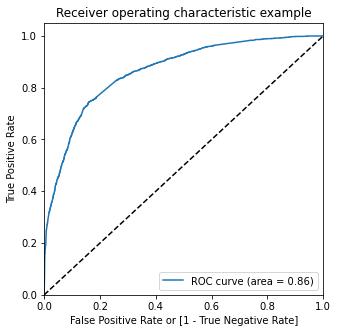

In [173]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

 Insight:

The area under the ROC curve is 0.86 which is very good


### 13. Finding Optimal Cutoff Point

In [174]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.075669,0,1,0,0,0,0,0,0,0,0,0
1,0,0.260582,0,1,1,1,0,0,0,0,0,0,0
2,0,0.321635,0,1,1,1,1,0,0,0,0,0,0
3,1,0.383764,0,1,1,1,1,0,0,0,0,0,0
4,1,0.804220,1,1,1,1,1,1,1,1,1,1,0


In [175]:
# Creating a dataframe to see the values of accuracy, sensitivity, and 
# specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and 
# specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.529051,0.985282,0.243278
0.2,0.2,0.698000,0.904742,0.568502
0.3,0.3,0.768068,0.837285,0.724712
0.4,0.4,0.803968,0.724448,0.853777
0.5,0.5,0.798299,0.650041,0.891165
0.6,0.6,0.783026,0.574816,0.913444
0.7,0.7,0.765391,0.484464,0.941357
0.8,0.8,0.739096,0.372445,0.968758
0.9,0.9,0.704613,0.244890,0.992574


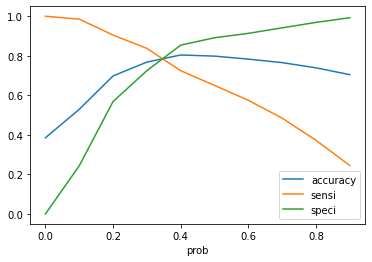

In [176]:
# Plotting Accuracy, Sensitivity and Specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Insight:

From the graph, we observe that the optimum cutoff is at 0.32


In [177]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.075669,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.260582,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.321635,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.383764,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.804220,1,1,1,1,1,1,1,1,1,1,0,1


In [178]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7746811525743977

Insight:

Overall accuracy of the model is 77.46% at cutoff 0.32


In [179]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2895, 1010],
       [ 421, 2025]], dtype=int64)

In [180]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [181]:
# Calculating the sensitivity
TP/(TP+FN)

0.8278822567457073

Insight:

Sensitivity of the model is 82.79% at cutoff 0.32


In [182]:
# Calculating the specificity
TN/(TN+FP)

0.7413572343149808

Insight:

Specificity of the model is 74.14% at cutoff 0.32

Insight:

With cutoff of 0.32, we have accuracy, sensitivity and specificity of around 80%


### 14. Prediction on Test Set

In [183]:
# Substituting all the columns in the final train model
col = X_train.columns

In [184]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Specialization_not provided,What is your current occupation_not provided,What is your current occupation_working professional
3271,1.0,0.235294,0.069102,0,1,0,0,0,0,0,1,1,0
1490,1.0,0.294118,0.665933,1,0,0,0,0,0,0,0,0,1
7936,1.0,0.117647,0.032570,0,1,0,0,0,0,0,1,1,0
4216,1.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0
3830,1.0,0.470588,0.072183,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.176471,0.364877,0,1,0,0,0,0,0,0,1,0
2879,1.0,0.117647,0.259243,0,1,0,0,0,0,0,0,0,0
6501,1.0,0.470588,0.587588,1,0,0,0,0,0,0,0,0,0
7155,1.0,0.176471,0.226673,1,0,0,0,0,0,0,0,1,0


In [185]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.053591
1,1,0.973412
2,0,0.042264
3,1,0.905650
4,0,0.075487


In [186]:
# Making prediction using cut off 0.32
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.053591,0
1,1,0.973412,1
2,0,0.042264,0
3,1,0.905650,1
4,0,0.075487,0
...,...,...,...
2718,0,0.241614,0
2719,0,0.419015,1
2720,1,0.724189,1
2721,0,0.096224,0


In [187]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7708409842085935

Insight:

Overall accuracy with test set is 77.08%


In [188]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1296,  438],
       [ 186,  803]], dtype=int64)

In [189]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [190]:
# Calculating the sensitivity
TP/(TP+FN)

0.8119312436804853

Insight:

Sensitivity with test set is 81.19%.


In [191]:
# Calculating the specificity
TN/(TN+FP)

0.7474048442906575

Insight:

Specificity with test set is 74.74%.


### 15. Precision-Recall

In [192]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3480,  425],
       [ 856, 1590]], dtype=int64)

In [193]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7890818858560794

In [194]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6500408830744072

Insight:

With cutoff of 0.32, we have Precision around 78.91% and Recall around 65.00%


#### 15.1 Precision and Recall Tradeoff

In [195]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [196]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

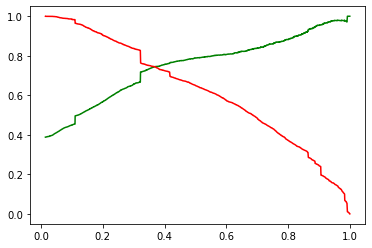

In [197]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [198]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.075669,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.260582,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.321635,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.383764,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.804220,1,1,1,1,1,1,1,1,1,1,0,1


In [199]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8023933238860022

In [200]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3297,  608],
       [ 647, 1799]], dtype=int64)

In [201]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [202]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7474034067303698

In [203]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7354865085854456

Insight:

With cutoff of 0.38, we have Precision around 74.70% and Recall around 73.55% for Train Set.


### 16. Prediction on Test Set

In [204]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.053591
1,1,0.973412
2,0,0.042264
3,1,0.905650
4,0,0.075487


In [205]:
# Making prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.053591,0
1,1,0.973412,1
2,0,0.042264,0
3,1,0.905650,1
4,0,0.075487,0
...,...,...,...
2718,0,0.241614,0
2719,0,0.419015,1
2720,1,0.724189,1
2721,0,0.096224,0


In [206]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8042600073448403

In [207]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1482,  252],
       [ 281,  708]], dtype=int64)

In [208]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [209]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7375

In [210]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7158746208291203

##### Insight:

With cutoff of 0.38, we have Precision of 73.75% and Recall of 71.59% for Test Set.


## 17. Final Observations

Train Data:

1. Accuracy    : 77.47%

2. Sensitivity : 82.79%

3. Specificity : 74.14%

Test Data:

1. Accuracy    : 77.08%

2. Sensitivity : 81.19%

3. Specificity : 74.74%

Insight:

Since the values of Accuracy, Sensitivity and Specificity of Train and Test Data is comparable and around 80%, the model seems to predict the conversion rate very well and will inspire CEO to take better decisions.